# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [397]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline


# **Base de dados** 

In [398]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# ***Especificação***
#### 1. **Coletar	dados ok**
#### 2.	**Realizar pré-processamento	dos	dados**	


*   Definição	de	tipos - ok
*   Tratamento	de	dados	ausentes - ok
*   Normalização	e	discretização 
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
#### 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações** 
#### 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças**


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Pré-processamento** 

### Visualização dos dados

In [399]:
# Dicionário do dataframe
df_dictionary

,FIELD,DESCRIPTION,REFERENCE,UNIT,SOURCE,Unnamed: 5
0,CITY,Name of the City,NaN,NaN,-,NaN
1,STATE,Name of the State,NaN,NaN,-,NaN
2,CAPITAL,1 if Capital of State,NaN,NaN,-,NaN
3,IBGE_RES_POP,Resident Population,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
4,IBGE_RES_POP_BRAS,Resident Population Brazilian,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
5,IBGE_RES_POP_ESTR,Redident Population Foreigners,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
6,IBGE_DU,Domestic Units Total,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
7,IBGE_DU_URBAN,Domestic Units Urban,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
8,IBGE_DU_RURAL,Domestic Units Rural,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
9,IBGE_POP,Resident Population Regular Urban Planning,2010,-,https://sidra.ibge.gov.br/tabela/3365,NaN


In [400]:
df_brazil.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,69,318,438,517,3542,416,319,1843,1689,0.708,0.687,0.830,0.622,-49.4405,-16.7588,893.6015,360,842,147.256,0,0,8583,Urbano,6201,27991,74750,36915,145858,20554,166412,8053,20665.0,Demais serviços,28227690,284,5,1,56,0,2,29,110,26,4,5,0,2,10,12,4,6,6,1,5,0,0,0,0,0,0,0,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,38,207,260,351,2709,589,4479,18017,2207,0.689,0.693,0.839,0.563,-47.3968,-18.4876,753.1249,77,296,881.064,Caminhos Do Cerrado,D,6972,Rural Adjacente,50525,25918,62689,28084,167215,12873,180089,7037,25592.0,Demais serviços,17909274,476,6,6,30,1,2,34,190,70,28,11,0,4,15,29,2,9,14,6,19,0,0,0,0,0,0,0,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,139,650,894,1087,6896,990,10307,33085,2202,0.689,0.671,0.841,0.579,-48.7188,-16.1827,1017.5506,227,720,1045.127,Região Turística Do Ouro E Cristais,C,19614,Rural Adjacente,42839,16728,138199,63396,261162,26823,287984,18427,15628.0,Demais serviços,37513019,288,5,9,26,0,2,7,117,12,57,2,1,0,7,15,3,11,5,1,8,0,0,1,34,1,1,1,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,1354,5567,7618,8905,53516,5996,25200,700872,3530,0.628,0.579,0.798,0.537,-48.8844,-1.7235,10.1203,3389,1218,1610.651,Araguaia-Tocantins,D,156292,Urbano,140464,58610,468129,486872,1154075,95180,1249255,151934,8222.0,"Administração, defesa, educação e saúde públic...",0,931,4,2,43,0,1,27,500,16,31,6,1,1,22,16,2,155,33,15,56,0,0,0,0,2,4,2,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,176,856,1233,1539,11979,2681,1862,7502,1994,0.698,0.720,0.848,0.556,-45.4462,-19.1558,644.7399,1230,1716,1817.067,Lago De Três Marias,D,23223,Urbano,113825,31003,172333,86081,403241,26994,430235,23574,18250.0,Demais serviços,0,621,18,1,40,0,1,20,303,62,30,9,6,4,28,27,2,15,19,9,27,0,0,0,0,2,2,2,2,44974716,371922572,6928,2953,0,0,0,0,4


In [401]:
df_brazil[['CITY','STATE','REGIAO_TUR','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].head(10)

,CITY,STATE,REGIAO_TUR,CATEGORIA_TUR,GVA_MAIN,RURAL_URBAN
0,Abadia De Goiás,GO,0,0,Demais serviços,Urbano
1,Abadia Dos Dourados,MG,Caminhos Do Cerrado,D,Demais serviços,Rural Adjacente
2,Abadiânia,GO,Região Turística Do Ouro E Cristais,C,Demais serviços,Rural Adjacente
3,Abaetetuba,PA,Araguaia-Tocantins,D,"Administração, defesa, educação e saúde públic...",Urbano
4,Abaeté,MG,Lago De Três Marias,D,Demais serviços,Urbano
5,Abaiara,CE,0,0,"Administração, defesa, educação e saúde públic...",Rural Adjacente
6,Abaré,BA,0,0,"Administração, defesa, educação e saúde públic...",Rural Remoto
7,Abatiá,PR,0,0,"Agricultura, inclusive apoio à agricultura e a...",Rural Adjacente
8,Abaíra,BA,Chapada Diamantina,D,"Administração, defesa, educação e saúde públic...",Rural Remoto
9,Abdon Batista,SC,Vale Do Contestado,D,"Administração, defesa, educação e saúde públic...",Rural Adjacente


In [402]:
#Setando campos como categóricos
#ajustando tipos dos dados
df_brazil['CAPITAL'] = df_brazil['CAPITAL'].astype('category')
df_brazil['STATE'] = df_brazil['STATE'].astype('category')
df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')
df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')



In [403]:
df_brazil[['CAPITAL','STATE','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].dtypes

CAPITAL          category
STATE            category
CATEGORIA_TUR    category
GVA_MAIN         category
RURAL_URBAN      category
dtype: object

In [404]:
df_brazil['CAPITAL'].cat.categories

Int64Index([0, 1], dtype='int64')

In [405]:
df_brazil['STATE'].cat.categories

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object')

In [406]:
df_brazil['CATEGORIA_TUR'].cat.categories

Index(['0', 'A', 'B', 'C', 'D', 'E'], dtype='object')

In [407]:
df_brazil['GVA_MAIN'].cat.categories

Index(['0',
       'Administração, defesa, educação e saúde públicas e seguridade social',
       'Agricultura, inclusive apoio à agricultura e a pós colheita',
       'Comércio e reparação de veículos automotores e motocicletas',
       'Construção', 'Demais serviços',
       'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
       'Indústrias de transformação', 'Indústrias extrativas',
       'Pecuária, inclusive apoio à pecuária',
       'Produção florestal, pesca e aquicultura'],
      dtype='object')

In [408]:
df_brazil['RURAL_URBAN'].cat.categories

Index(['0', 'Intermediário Adjacente', 'Intermediário Remoto',
       'Rural Adjacente', 'Rural Remoto', 'Sem classificação', 'Urbano'],
      dtype='object')

### Limpeza de dados

###### Verificando se existe dados duplicados

In [409]:
len(df_brazil)


5578

In [410]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [411]:
len(df_brazil)

5576

In [412]:
df_brazil[df_brazil['CITY'] == 'Paraty'][['CITY','STATE','LAT','LONG']]

,CITY,STATE,LAT,LONG
3561,Paraty,RJ,-23.2194,-44.7109
3562,Paraty,RJ,-23.2194,-44.7109


In [413]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [414]:
len(df_brazil)

5575

###### Limpeza de dados discrepantes

In [415]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)][['CITY', 'STATE', 'AREA', 'IDHM']]


,CITY,STATE,AREA,IDHM
4448,Santa Teresinha,BA,0.0,0.587
4746,São Caetano,PE,0.0,0.000
5070,São Vicente do Seridó,PB,0.0,0.555


In [416]:
#Limpando as cidades que tem área 0
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] < 3.565)].index, inplace=True)

In [417]:
len(df_brazil)

5572

In [418]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)][['CITY', 'STATE', 'AREA', 'IBGE_RES_POP']]

,CITY,STATE,AREA,IBGE_RES_POP
436,Balneário Rincão,SC,63.431,0
2666,Lagoa Dos Patos,RS,10158.754,0
2673,Lagoa Mirim,RS,2859.139,0
3079,Mojuí Dos Campos,PA,4988.236,0
3569,Paraíso Das Águas,MS,5061.433,0
3722,Pescaria Brava,SC,106.853,0
3781,Pinto Bandeira,RS,104.856,0


In [419]:
#Eliminando as cidades que tem menos de 776 habitantes
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP'] < 776)].index, inplace=True)

In [420]:
len(df_brazil)

5565

In [421]:
#Verificando as cidades que tem IDHM menor que 0.0
df_brazil.loc[(df_brazil['IDHM'] == 0.0)][['CITY','STATE','IDHM','IDHM_Renda','IDHM_Longevidade','IDHM_Educacao']]

,CITY,STATE,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
4456,Santa Terezinha,BA,0.0,0.0,0.0,0.0
5066,São Vicente Do Seridó,PB,0.0,0.0,0.0,0.0


In [422]:
#Eliminando as cidades que tem IDHM menor que 0.0
df_brazil.drop(df_brazil.loc[(df_brazil['IDHM'] == 0.0)].index, inplace=True)

### Discretização de dados 

###### IDHM

In [423]:
df_brazil['IDHM_dist'] = 'Muito Baixo'

In [424]:
df_brazil.loc[(df_brazil['IDHM'] <= 0.499),'IDHM_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.5) & (df_brazil['IDHM'] <= 0.599),'IDHM_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.6) & (df_brazil['IDHM'] <= 0.699),'IDHM_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM'] >= 0.7) & (df_brazil['IDHM'] <= 0.799),'IDHM_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM'] >= 0.8) & (df_brazil['IDHM'] <= 1),'IDHM_dist'] = 'Muito Alto'
df_brazil['IDHM_dist'] = df_brazil['IDHM_dist'].astype('category')

In [425]:
df_brazil['IDHM_dist'].cat.categories

Index(['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio'], dtype='object')

In [426]:
df_brazil['IDHM_dist'].value_counts()

Médio          2233
Alto           1889
Baixo          1365
Muito Alto       44
Muito Baixo      32
Name: IDHM_dist, dtype: int64

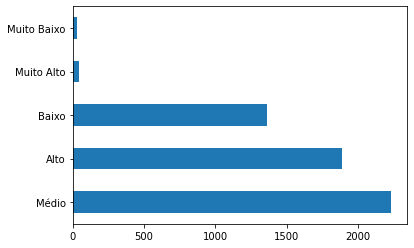

In [427]:
df_brazil['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [428]:
df_brazil[['CITY','IDHM','IDHM_dist']].head()

,CITY,IDHM,IDHM_dist
0,Abadia De Goiás,0.708,Alto
1,Abadia Dos Dourados,0.689,Médio
2,Abadiânia,0.689,Médio
3,Abaetetuba,0.628,Médio
4,Abaeté,0.698,Médio


### Normalização
. Ainda vou fazer

In [429]:
 
print(df_brazil.isnull().sum())

CITY                      0
STATE                     0
CAPITAL                   0
IBGE_RES_POP              0
IBGE_RES_POP_BRAS         0
IBGE_RES_POP_ESTR         0
IBGE_DU                   0
IBGE_DU_URBAN             0
IBGE_DU_RURAL             0
IBGE_POP                  0
IBGE_1                    0
IBGE_1-4                  0
IBGE_5-9                  0
IBGE_10-14                0
IBGE_15-59                0
IBGE_60+                  0
IBGE_PLANTED_AREA         0
IBGE_CROP_PRODUCTION_$    0
IDHM Ranking 2010         0
IDHM                      0
IDHM_Renda                0
IDHM_Longevidade          0
IDHM_Educacao             0
LONG                      0
LAT                       0
ALT                       0
PAY_TV                    0
FIXED_PHONES              0
AREA                      0
REGIAO_TUR                0
CATEGORIA_TUR             0
ESTIMATED_POP             0
RURAL_URBAN               0
GVA_AGROPEC               0
GVA_INDUSTRY              0
GVA_SERVICES        

In [430]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5563 entries, 0 to 5577
Data columns (total 82 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CITY                    5563 non-null   object  
 1   STATE                   5563 non-null   category
 2   CAPITAL                 5563 non-null   category
 3   IBGE_RES_POP            5563 non-null   int64   
 4   IBGE_RES_POP_BRAS       5563 non-null   int64   
 5   IBGE_RES_POP_ESTR       5563 non-null   int64   
 6   IBGE_DU                 5563 non-null   int64   
 7   IBGE_DU_URBAN           5563 non-null   int64   
 8   IBGE_DU_RURAL           5563 non-null   int64   
 9   IBGE_POP                5563 non-null   int64   
 10  IBGE_1                  5563 non-null   int64   
 11  IBGE_1-4                5563 non-null   int64   
 12  IBGE_5-9                5563 non-null   int64   
 13  IBGE_10-14              5563 non-null   int64   
 14  IBGE_15-59              

<AxesSubplot:>

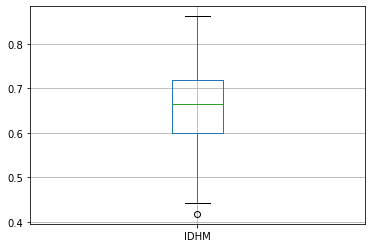

In [431]:
df_brazil.boxplot(column=['IDHM'])

In [432]:
df_brazil.loc[(df_brazil['IDHM'] ==  1) | (df_brazil['IDHM'] > 0.6)][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
0,Abadia De Goiás,GO,0.708
1,Abadia Dos Dourados,MG,0.689
2,Abadiânia,GO,0.689
3,Abaetetuba,PA,0.628
4,Abaeté,MG,0.698
5,Abaiara,CE,0.628
7,Abatiá,PR,0.687
8,Abaíra,BA,0.603
9,Abdon Batista,SC,0.694
10,Abel Figueiredo,PA,0.622


In [433]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
sudeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

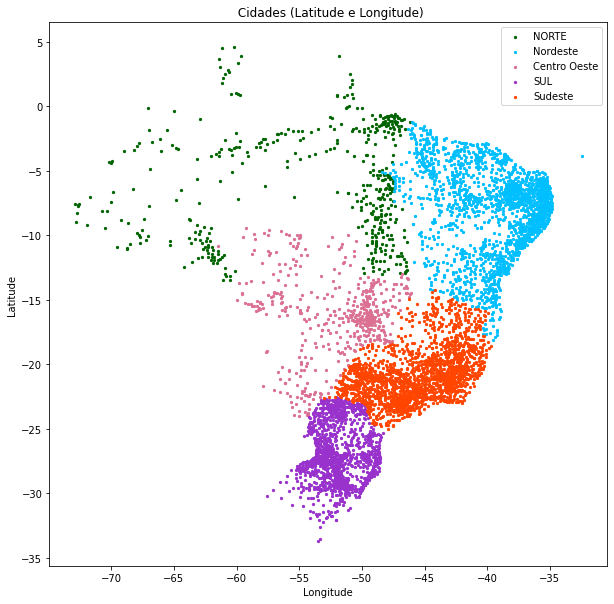

In [434]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
#cap = df_brazil.loc[df_brazil['CAPITAL'] == 1 & df_brazil["STATE"].isin(nordeste) ]

#cidadesNordeste = nordeste["STATE"].isin(checknordeste)
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#000000')
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')
#plt.scatter(df_brazil[long&lat&~cidadesNordeste]["LONG"], df_brazil[long&lat&~cidadesNordeste]["LAT"], s=1, alpha=1, c = '#4b0082')
plt.legend()
plt.show()

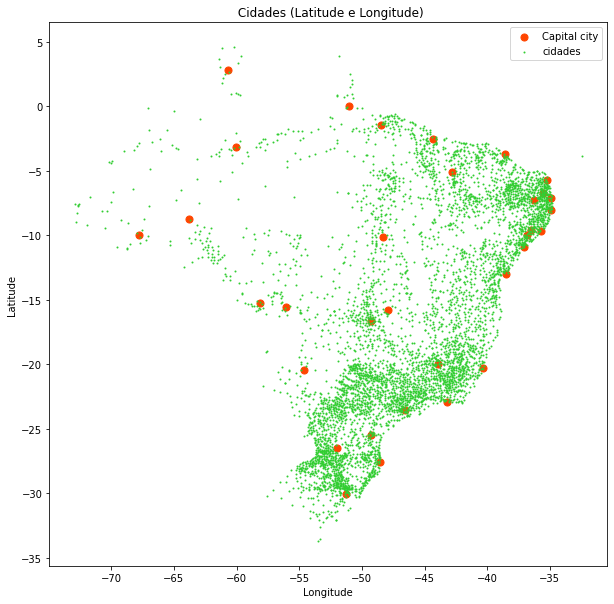

In [435]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

# **Índice de Desenvolvimento Humano** 

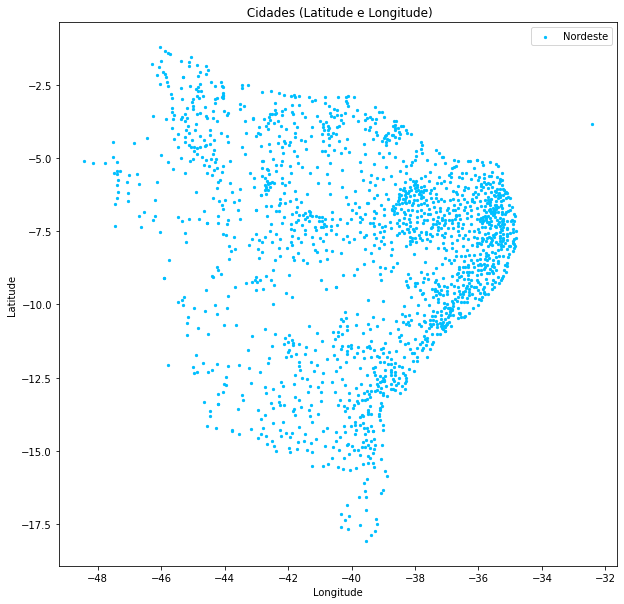

In [436]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.legend()
plt.show()

<AxesSubplot:>

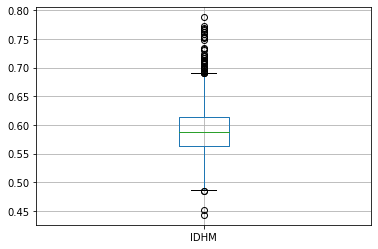

In [437]:
nordeste.boxplot(column=['IDHM'])

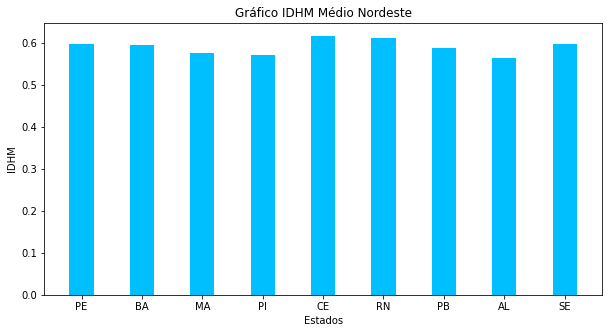

In [438]:
# Criando lista
dados =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
Estados = list(dados.keys())
MediaIDHM = list(dados.values())
fig = plt.figure(figsize = (10, 5))

# criando Gráfico
plt.bar(Estados, MediaIDHM, color ='#00BFFF',width = 0.4)
plt.xlabel("Estados")
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.show()

# **Pernambuco**

In [439]:
nordeste.loc[(nordeste['STATE'] == "PE")].head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDHM_dist
13,Abreu E Lima,PE,0,94429,94407,22,28182,25944,2238,81482,1050,4405,6255,7019,54749,8004,387,2595,2477,0.679,0.625,0.791,0.632,-34.8991,-7.9044,27.0606,1418,4661,126.193,Costa Náutica Coroa Do Avião,D,99622,Urbano,7799,384262,526039,336142,1254241,170265,1424506,98990,14390.0,Demais serviços,119645700,841,1,0,130,0,2,26,434,27,36,14,3,4,18,30,2,47,20,6,41,0,0,0,0,2,3,2,3,155632735,460626103,14579,10122,0,0,0,0,1,Médio
32,Afogados Da Ingazeira,PE,0,35088,35088,0,10879,8667,2212,27335,389,1766,2324,2618,16849,3389,3625,1404,2974,0.657,0.623,0.807,0.565,-37.6377,-7.7483,515.3462,771,4181,377.696,Território Da Poesia E Da Cantoria,C,37111,Urbano,7598,33313,180016,127393,348319,37330,385649,36866,10461.0,"Administração, defesa, educação e saúde públic...",68786461,527,1,0,27,0,2,13,305,3,24,15,5,2,11,15,9,15,19,9,52,0,0,0,0,1,2,1,2,95355383,251149663,5737,10461,0,0,0,0,1,Médio
36,Afrânio,PE,0,17586,17586,0,4744,1681,3063,5841,91,477,570,553,3616,534,7000,173,4445,0.588,0.542,0.761,0.493,-41.0058,-8.5111,515.8429,39,533,1490.594,0,0,19456,Rural Adjacente,8158,6727,52943,72458,140286,10053,150340,19225,7820.0,"Administração, defesa, educação e saúde públic...",44498864,141,0,0,11,0,0,2,84,1,6,2,0,0,3,1,3,22,1,1,4,0,0,0,0,0,1,0,1,0,44765064,809,3677,0,0,0,0,4,Baixo
38,Agrestina,PE,0,22679,22679,0,6882,5209,1673,16935,242,1046,1487,1761,10195,2204,361,667,4350,0.592,0.581,0.760,0.470,-35.9468,-8.4560,437.1549,542,520,200.581,Encantos Do Agreste,D,24702,Intermediário Adjacente,20548,19201,75135,89128,204012,16678,220690,24454,9025.0,"Administração, defesa, educação e saúde públic...",48941210,225,5,2,23,0,2,4,100,3,13,3,0,1,5,5,6,18,9,2,24,0,0,1,8,0,1,0,1,0,33677594,2825,2929,0,0,0,0,3,Baixo
57,Alagoinha,PE,0,13759,13753,6,4108,2410,1698,7769,120,502,666,742,4635,1104,638,611,4184,0.599,0.569,0.801,0.472,-36.7755,-8.4663,731.3153,318,427,216.452,0,0,14554,Rural Adjacente,21339,2581,33069,57171,114159,4812,118971,14431,8244.0,"Administração, defesa, educação e saúde públic...",31782188,61,0,0,5,0,0,0,43,1,0,0,0,0,3,1,4,2,0,0,2,0,0,0,0,0,1,0,1,0,25113414,1210,1153,0,0,0,0,1,Baixo


<AxesSubplot:>

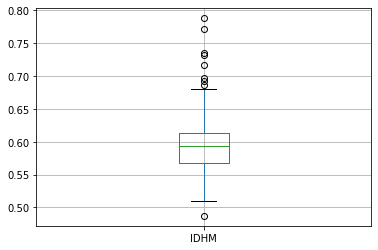

In [440]:
nordeste.loc[(nordeste['STATE'] == "PE")].boxplot(column=['IDHM'])

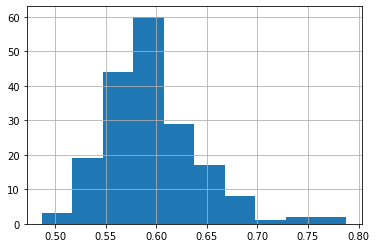

In [441]:
histPE=nordeste[nordeste['STATE'] == "PE"]['IDHM'].hist()

In [442]:
#Quantidades de cidades de Pernambuco
nordeste.loc[(nordeste['STATE'] == "PE")]['CITY'].count()

185

In [443]:
#Quantidade de Habitantes
nordeste.loc[(nordeste['STATE'] == "PE")]['IBGE_RES_POP'].sum()

8796448

<AxesSubplot:>

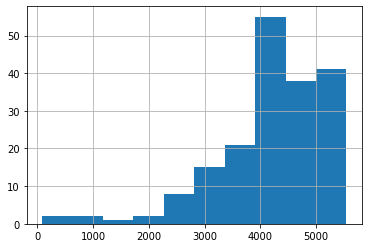

In [444]:
#Rankim IDHM PE

nordeste.loc[(nordeste['STATE'] == "PE")]['IDHM Ranking 2010'].hist()

In [445]:
nordeste.loc[(nordeste['IDHM'] <= 0.5) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
2848,Manari,PE,0.487


In [446]:
#As 10 cidades com IDHM maior 
nordeste.loc[(nordeste['IDHM'] >= 0.650) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM','IBGE_RES_POP','GDP','COMP_TOT']].sort_values('IDHM', ascending=False).head(10)

,CITY,STATE,IDHM,IBGE_RES_POP,GDP,COMP_TOT
1735,Fernando De Noronha,PE,0.788,2630,124324,236
4078,Recife,PE,0.772,1537704,49544088,40041
3410,Olinda,PE,0.735,377779,5272902,5585
3632,Paulista,PE,0.732,300466,3816017,3007
2427,Jaboatão Dos Guararapes,PE,0.717,644620,13470924,7497
3724,Petrolina,PE,0.697,293962,5794761,5646
882,Camaragibe,PE,0.692,144466,1475711,1328
794,Cabo De Santo Agostinho,PE,0.686,185025,8811690,2047
1102,Carpina,PE,0.680,74858,1270916,1383
13,Abreu E Lima,PE,0.679,94429,1424506,841


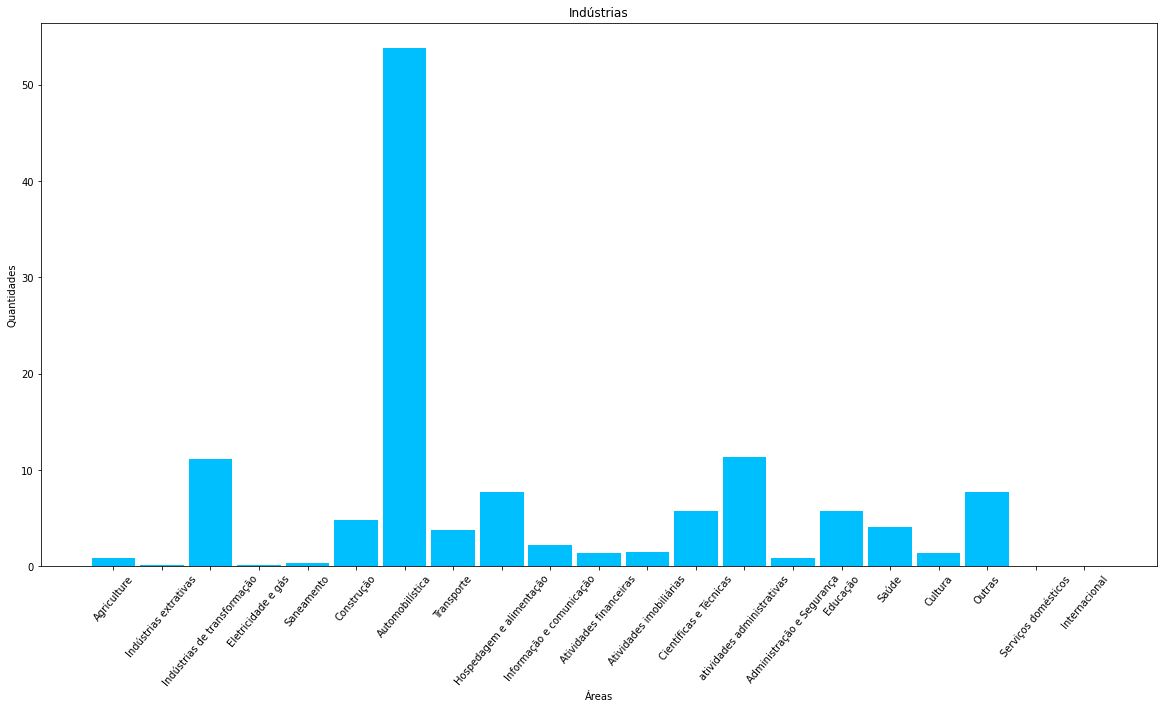

In [447]:
# Criando lista
dados =  {'Agriculture':nordeste[nordeste['STATE'] == 'PE'].COMP_A.sum()/1000,'Indústrias extrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_B.sum()/1000,'Indústrias de transformação':nordeste[nordeste['STATE'] == 'PE'].COMP_C.sum()/1000,'Eletricidade e gás':nordeste[nordeste['STATE'] == 'PE'].COMP_D.sum()/1000,'Saneamento':nordeste[nordeste['STATE'] == 'PE'].COMP_E.sum()/1000,'Construção':nordeste[nordeste['STATE'] == 'PE'].COMP_F.sum()/1000,'Automobilística':nordeste[nordeste['STATE'] == 'PE'].COMP_G.sum()/1000,'Transporte':nordeste[nordeste['STATE'] == 'PE'].COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste[nordeste['STATE'] == 'PE'].COMP_I.sum()/1000,'Informação e comunicação':nordeste[nordeste['STATE'] == 'PE'].COMP_J.sum()/1000,'Atividades financeiras':nordeste[nordeste['STATE'] == 'PE'].COMP_K.sum()/1000,'Atividades imobiliárias':nordeste[nordeste['STATE'] == 'PE'].COMP_L.sum()/1000,'Científicas e Técnicas':nordeste[nordeste['STATE'] == 'PE'].COMP_M.sum()/1000,'atividades administrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_N.sum()/1000,'Administração e Segurança':nordeste[nordeste['STATE'] == 'PE'].COMP_O.sum()/1000,'Educação':nordeste[nordeste['STATE'] == 'PE'].COMP_P.sum()/1000,'Saúde':nordeste[nordeste['STATE'] == 'PE'].COMP_Q.sum()/1000,'Cultura':nordeste[nordeste['STATE'] == 'PE'].COMP_R.sum()/1000,'Outras':nordeste[nordeste['STATE'] == 'PE'].COMP_S.sum()/1000,'Serviços domésticos':nordeste[nordeste['STATE'] == 'PE'].COMP_T.sum()/1000,'Internacional':nordeste[nordeste['STATE'] == 'PE'].COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 50)
plt.xlabel("Áreas")
plt.ylabel("Quantidades")
plt.title("Indústrias")
plt.show()

# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [448]:
df_brazil.describe()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.0,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000
mean,3.428652e+04,3.420899e+04,77.532447,1.030173e+04,8.858399e+03,1443.332734,2.760334e+04,383.391156,1545.000719,2069.941758,2382.150998,1.821767e+04,3.005178e+03,1.417520e+04,5.737110e+04,2782.270897,0.659189,0.642911,0.801580,0.559131,-46.207464,-16.441194,417.669202,3.097927e+03,6.574868e+03,1525.524715,3.746662e+04,5.507143e+04,2.067202e+05,5.420554e+05,1.698443e+05,9.736914e+05,1.526967e+05,1.126388e+06,3.703291e+04,21124.391336,7.648571e+07,907.754988,18.273773,1.853496,73.527234,0.426568,2.030919,43.300557,348.355204,41.039008,55.940859,24.773144,15.570196,15.157109,51.353946,83.796153,3.271436,30.989754,34.190365,12.191803,51.663131,0.0,0.050333,0.499191,41.049973,2.032536,1.699443,0.788244,0.948948,5.514938e+09,3.607589e+09,9.856126e+03,4.876879e+03,5.751393,0.022470,0.127629,0.037749,2.037929
std,2.031486e+05,2.015262e+05,1796.200807,6.477685e+04,6.437040e+04,1691.464991,1.859907e+05,2327.219255,9254.720380,12315.687746,14188.572665,1.252281e+05,2.325197e+04,4.407418e+04,1.482177e+05,1606.438572,0.071990,0.080652,0.044673,0.093324,6.495145,8.287122,288.746554,3.581715e+04,8.805203e+04,5609.631852,2.201051e+05,9.209407e+04,1.298378e+06,7.143538e+06,1.560182e+06,9.424157e+06,1.966984e+06,1.136738e+07,2.171479e+05,20319.700288,7.419256e+08,8338.962484,81.091139,6.183133,500.174071,6.342223,11.761479,407.729268,2431.902618,300.714007,484.505767,547.933530,341.047131,212.830232,767.968663,1233.339892,6.061327,261.168458,366.500654,122.408337,429.979887,0.0,1.928976,2.865646,308.007141,26.580819,11.246922,1.781308,1.069628,2.779491e+11,1.165895e+11,9.187892e+04,2.094232e+04,55.375420,0.148219,2.154304,0.534006,4.383721
min,8.050000e+02,8.050000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,1.740000e+02,0.000000,5.000000,7.000000,12.000000,9.400000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.000000,0.418000,0.400000,0.672000,0.207000,-72.916500,-33.687600,0.000000,1.000000e+00,3.000000e+00,3.565000,7.860000e+02,0.000000e+00,3.610000e+02,2.036000e+03,7.258000e+03,1.133500e+04,-1.415900e+04,1.167500e+04,8.150000e+02,3191.000000,0.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [449]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [450]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

<AxesSubplot:xlabel='RURAL_URBAN'>

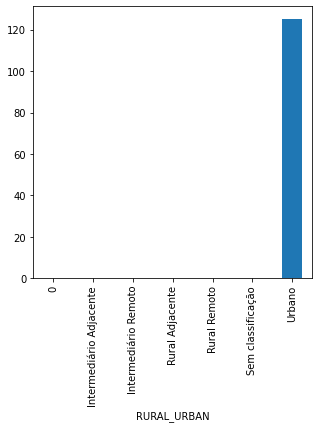

In [451]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

<AxesSubplot:ylabel='None'>

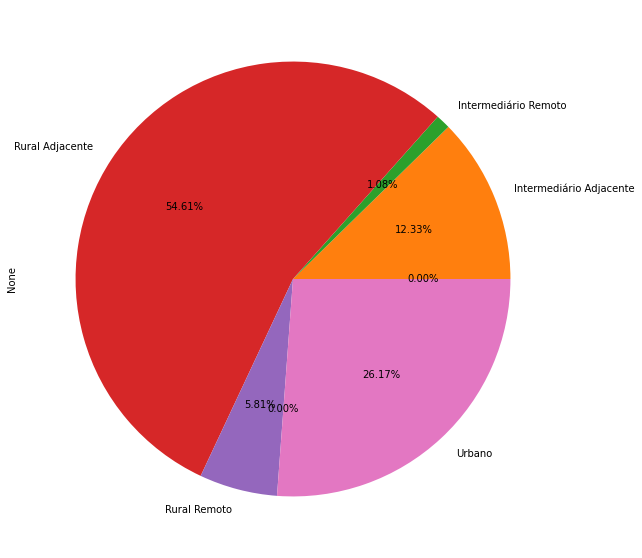

In [452]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [453]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [454]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

<h1> <font color ="yellow">Limpeza</font> <font color="green">dos dados</font><h1>

<h3>Univariado usando Z-Score robusto<h3>

In [455]:
df_brazil['TAXES'].value_counts()

7582        2
4075        2
2272        1
4785        1
6850        1
5824        1
1531        1
14906       1
60090       1
296633      1
314910      1
117430      1
32443       1
6175        1
11952       1
18519       1
6831        1
58030       1
21164       1
3754        1
726697      1
28327       1
2725        1
1200804     1
61090       1
15009       1
75462       1
80588       1
2632        1
9939        1
591         1
2815        1
12030       1
1564        1
51962       1
5880        1
52983       1
17100       1
69338       1
3821        1
157415      1
8933        1
403172      1
28387       1
141025      1
69344       1
139818      1
212701      1
110299      1
2778        1
1753        1
32480       1
13667       1
18965       1
668         1
3844        1
35388       1
20054       1
397909      1
174676      1
14929       1
61007       1
75341       1
25160       1
49734       1
610882      1
85568       1
30266       1
85592       1
7731        1
1586        1
41215 

In [456]:
df_brazil['TAXES'].describe()

count    4.260000e+02
mean     2.129235e+05
std      1.595879e+06
min      5.910000e+02
25%      6.292750e+03
50%      2.008100e+04
75%      6.898725e+04
max      2.914558e+07
Name: TAXES, dtype: float64

<AxesSubplot:>

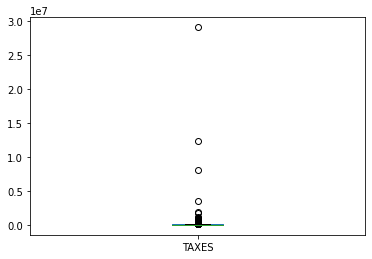

In [457]:
# Plotando o gráfico para ver as outliers
df_brazil['TAXES'].plot.box()

<AxesSubplot:>

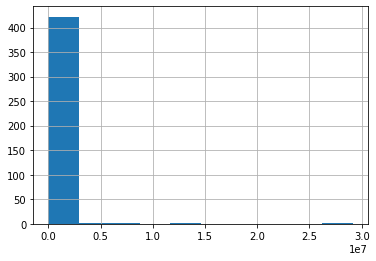

In [458]:
df_brazil['TAXES'].hist()

<AxesSubplot:>

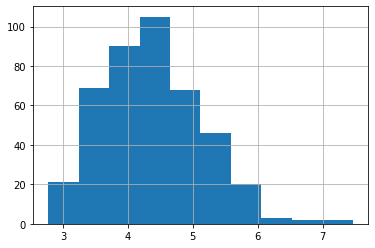

In [459]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['TAXES_Log'] = log10(df_brazil['TAXES'])
 df_brazil['TAXES_Log'].hist()

In [460]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['TAXES_Log'] - df_brazil['TAXES_Log'].median()).median()*(1/0.6745)
print(mad)

0.7598219750170238


<AxesSubplot:>

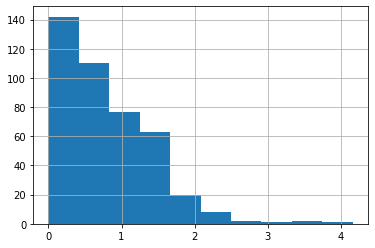

In [461]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad).hist()

In [462]:
# Usando a limiar > 2.5, encontro os outliers
df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad > 2.5]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDHM_dist,TAXES_Log
719,Brasília,DF,1,2570160,2564370,5790,774820,751558,23261,2450634,35833,143641,190078,207283,1683918,189881,162894,822413,9,0.824,0.863,0.873,0.742,-47.8879,-15.7941,1115.2484,460682,920410,5760.783,Brasília - Patrimônio Cultural Da Humanidade,A,2974703,Urbano,820755,9659849,103819470,92051448,206351521,29145585,235497107,2977216,79100.0,"Administração, defesa, educação e saúde públic...",0,86200,242,42,3269,22,130,4685,29018,2157,6788,3254,1527,1670,6717,10346,204,3043,5363,1197,6403,0,123,23,4960,150,274,14,4,292093270172,8016164488595,1288107,211392,594,1,28,1,60,Muito Alto,7.464573
933,Campo Grande,MS,1,786797,785017,1780,250542,247159,3383,765394,11390,44074,54942,63075,515538,76375,84434,209002,108,0.784,0.790,0.844,0.724,-54.6157,-20.4580,544.5121,99092,240380,8092.951,Caminho Dos Ipês,A,885711,Urbano,308918,3792766,12943149,4895739,21940571,3497357,25437928,863982,29443.0,Demais serviços,2662884470,23872,264,20,1229,4,72,1448,9121,1096,1453,628,350,413,1863,2165,74,714,941,405,1612,0,0,5,687,58,43,8,3,9588640536,122580555181,302311,169030,123,1,4,1,24,Alto,6.543740
2849,Manaus,AM,1,1802014,1798773,3241,461426,458959,2467,1760829,32853,125335,161262,175966,1159569,105844,890,25198,852,0.737,0.738,0.826,0.658,-60.0233,-3.1347,34.3563,234594,236595,11401.092,Polo Amazônico,A,2145444,Urbano,212145,25131157,24632349,7887482,57863132,12433232,70296364,2094391,33564.0,Indústrias de transformação,4003955249,21586,36,6,1478,10,91,1286,8656,995,1325,418,206,211,1418,1911,97,1021,1100,218,1098,0,5,34,3401,69,49,8,3,13996268907,232305730782,373985,192002,77,1,3,0,21,Alto,7.094584
3927,Porto Velho,RO,1,428527,427841,686,119755,109628,10126,387189,6289,25876,33155,37690,262419,21760,48577,332551,890,0.736,0.764,0.819,0.638,-63.8314,-8.7689,86.8954,33953,78677,34090.954,Polo Porto Velho,A,519531,Urbano,542219,3471803,5919603,2905512,12839137,1902607,14741744,511219,28836.0,Demais serviços,1112542140,8883,52,28,524,6,19,431,3976,248,649,131,122,96,503,705,24,296,433,94,546,0,0,1,348,20,21,3,3,1888267091,16961139220,113792,108884,10,1,1,0,16,Alto,6.279349
5326,Uberaba,MG,0,295988,295644,344,96944,94685,2259,285743,3461,13981,17792,20904,193561,36044,241142,1109748,212,0.772,0.772,0.845,0.705,-47.9836,-19.7135,777.4575,36393,105737,4523.957,Alta Mogiana,B,330361,Urbano,769478,3763235,5951960,1281584,11766258,1687337,13453594,325279,41360.0,Demais serviços,868573795,10670,162,17,941,2,25,578,4303,487,809,172,160,163,621,882,10,301,407,129,501,0,0,0,0,25,11,4,2,3204456039,8100860683,122698,60104,27,1,3,1,11,Alto,6.227202
5327,Uberlândia,MG,0,604013,603274,739,196195,191137,5058,580561,7522,29862,38797,43553,401473,59354,104672,440667,72,0.789,0.776,0.885,0.716,-48.2780,-18.9190,866.7823,63571,252242,4115.206,Alta Mogiana,B,683247,Urbano,556693,6267618,15005187,2682010,24511508,8024748,32536256,669672,48585.0,Demais serviços,1698288997,25562,173,31,1669,4,40,1782,9438,1395,1317,773,479,532,1713,2795,11,800,1085,337,1188,0,0,2,442,46,23,8,2,32121822440,35931873949,247595,119057,391,1,4,1,22,Alto,6.904431


In [463]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad < 2.5]

<AxesSubplot:>

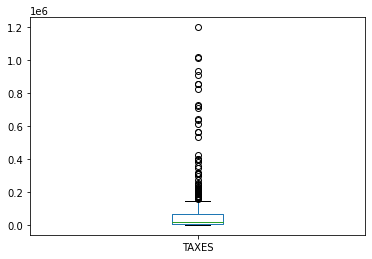

In [464]:
df_brazil['TAXES'].plot.box()